# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a [Meetup](https://www.meetup.com/) dataset for events occurring in Nashville.

## Objectives

You will be able to: 

- Make visualizations of clusters and gain insights about how the clusters have formed 
- Cluster a real-life social network dataset to detect communities within the network  


## Load the Dataset

To get started, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [4]:
import pandas as pd
groups=pd.read_csv('nashville-meetup/group-edges.csv',index_col=0)
groups.head()

group1    group2  weight
0  19292162    535553       2
1  19292162  19194894       1
2  19292162  19728145       1
3  19292162  18850080       2
4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [5]:
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')
groups_meta.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [27]:
group_dict = dict(zip(groups_meta.group_id, groups_meta.group_name))

In [33]:
import networkx as nx
G=nx.Graph()
for row in groups.index:
    source=group_dict[groups.group1[row]]
    target=group_dict[groups.group2[row]]
    weight=groups.weight[row]
    G.add_edge(source,target,weight=weight)

## Visualize the Network

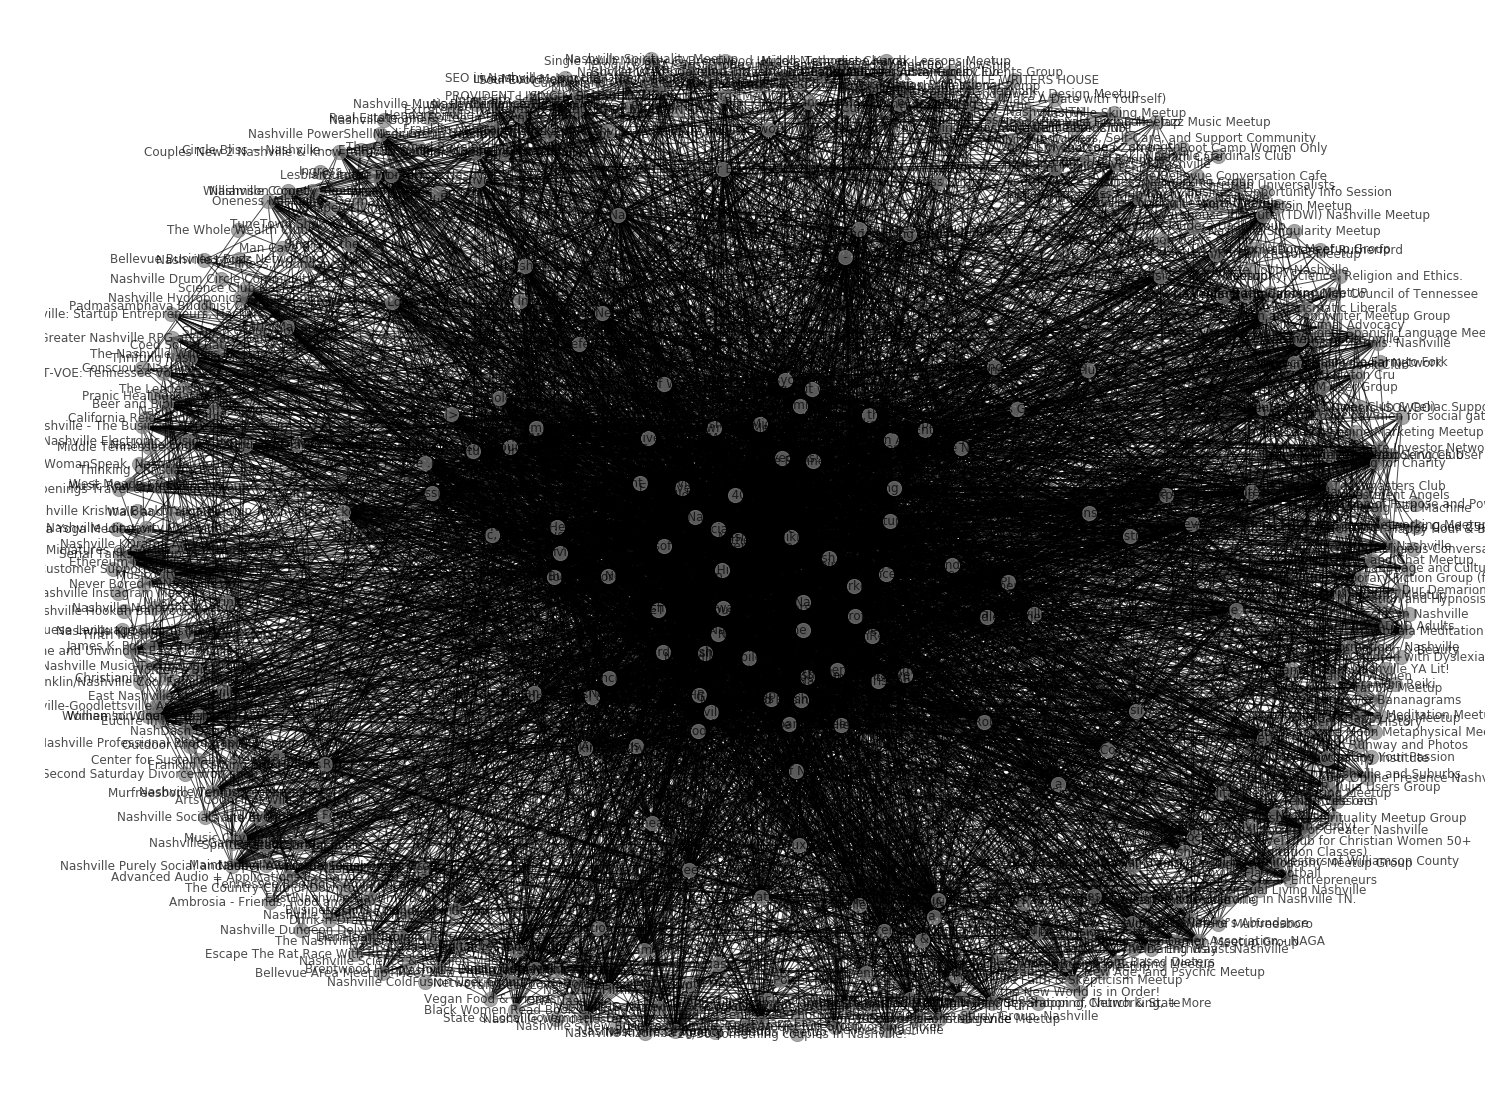

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
nx.draw(G,pos=nx.spring_layout(G,k=2),alpha=0.7,node_color='gray',node_size=200,with_labels=True)

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [43]:
groups.weight.describe()

count    6692.000000
mean        2.301853
std         4.089973
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        91.000000
Name: weight, dtype: float64

In [47]:
groups.weight.quantile(0.95)

7.0

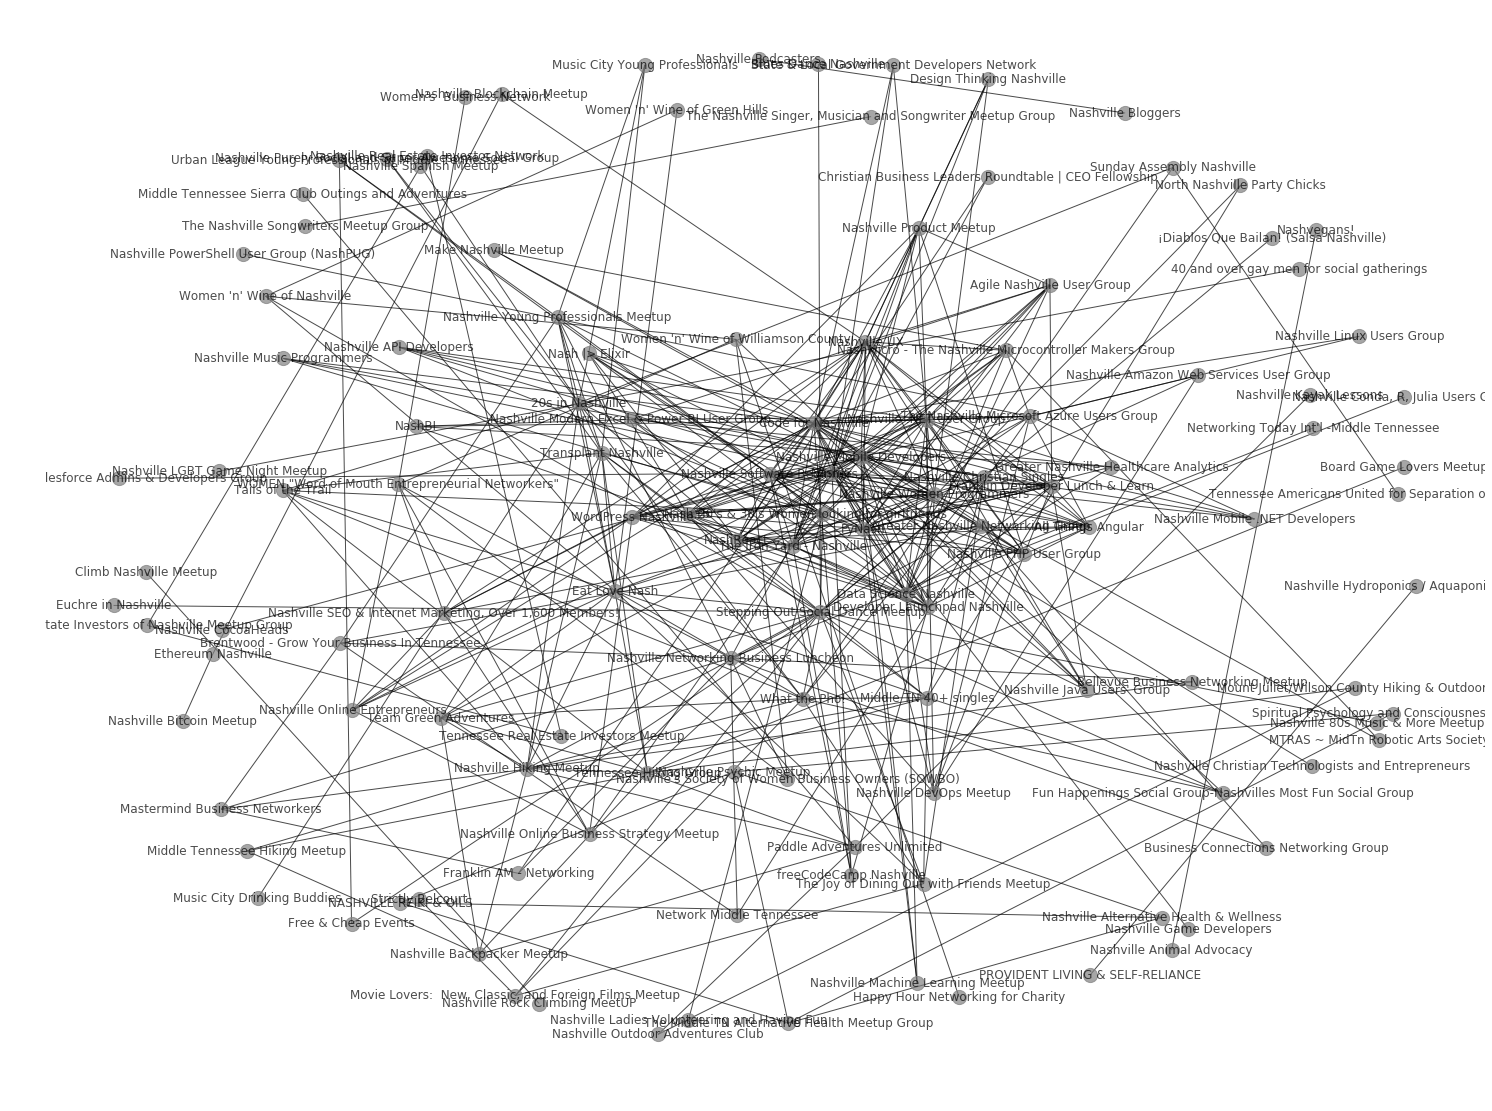

In [49]:
G=nx.Graph()
threshold=7
for row in groups.index:
    source=group_dict[groups.group1[row]]
    target=group_dict[groups.group2[row]]
    weight=groups.weight[row]
    if weight>=threshold:
        G.add_edge(source,target,weight=weight)
    else:
        continue
plt.figure(figsize=(20,15))
nx.draw(G,pos=nx.spring_layout(G,k=2),alpha=0.7,node_color='gray',node_size=200,with_labels=True)

## Cluster the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [52]:
clusters=list(nx.algorithms.community.centrality.girvan_newman(G))
for n,cluster in enumerate(clusters):
    print(f'{n} edges removed --> {len(cluster)} clusters present')

0 edges removed --> 10 clusters present
1 edges removed --> 11 clusters present
2 edges removed --> 12 clusters present
3 edges removed --> 13 clusters present
4 edges removed --> 14 clusters present
5 edges removed --> 15 clusters present
6 edges removed --> 16 clusters present
7 edges removed --> 17 clusters present
8 edges removed --> 18 clusters present
9 edges removed --> 19 clusters present
10 edges removed --> 20 clusters present
11 edges removed --> 21 clusters present
12 edges removed --> 22 clusters present
13 edges removed --> 23 clusters present
14 edges removed --> 24 clusters present
15 edges removed --> 25 clusters present
16 edges removed --> 26 clusters present
17 edges removed --> 27 clusters present
18 edges removed --> 28 clusters present
19 edges removed --> 29 clusters present
20 edges removed --> 30 clusters present
21 edges removed --> 31 clusters present
22 edges removed --> 32 clusters present
23 edges removed --> 33 clusters present
24 edges removed --> 34 cl

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

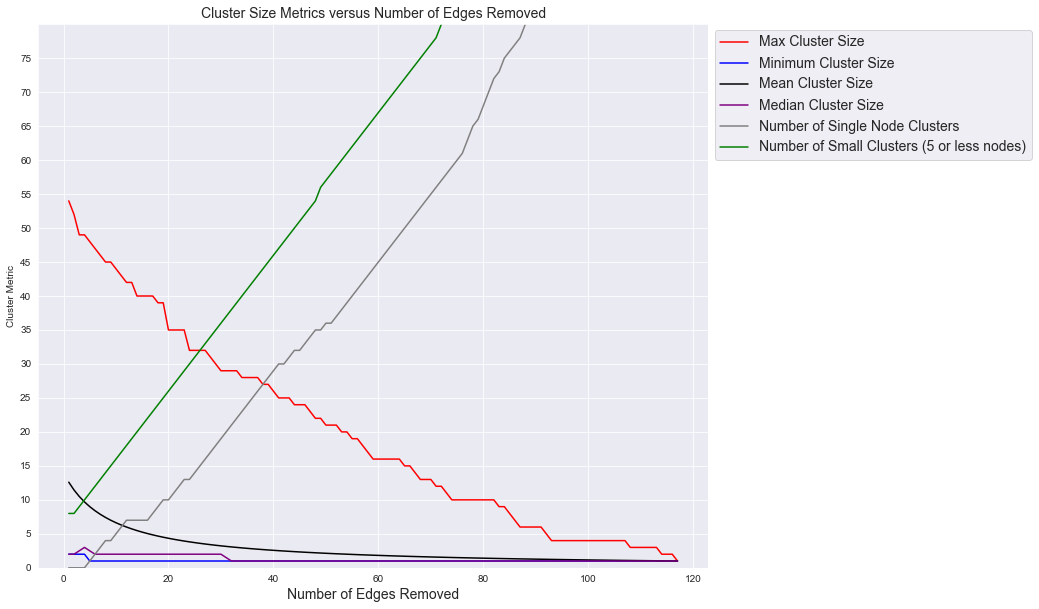

In [54]:
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in clusters]
plt.plot(x,max_cluster_size, color='red', label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in clusters]
plt.plot(x,min_cluster_size, color='blue', label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in clusters]
plt.plot(x,mean_cluster_size, color='black', label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in clusters]
plt.plot(x,median_cluster_size, color='purple', label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in clusters]
plt.plot(x,single_node_clusters, color='gray', label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in clusters]
plt.plot(x,small_clusters, color='green', label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\alvar\AppData\Local\Continuum\anaconda3\l

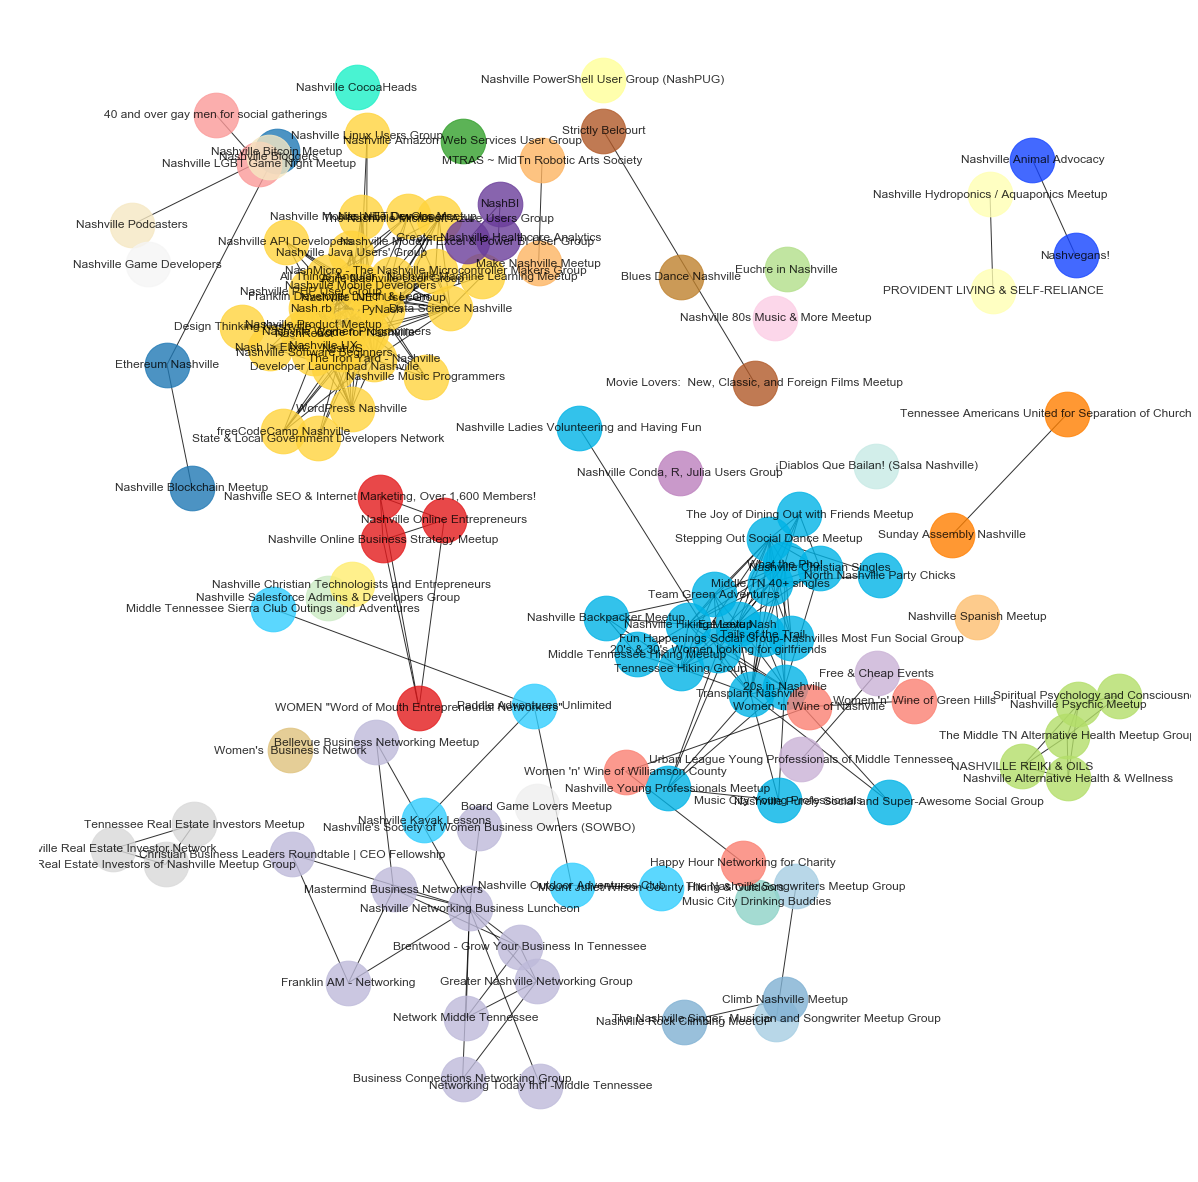

In [65]:
colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
          '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
          '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
          '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
          '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
          '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
          '#80cdc1', '#35978f', '#01665e', '#003c30']
plt.figure(figsize=(16,16))
for n , c in enumerate(clusters[25]):
    ci = G.subgraph(c)
    nx.draw(ci, pos=nx.spring_layout(G, k=0.6, seed=3), with_labels=True, node_color=colors[n],
            alpha=0.8, node_size=2000)
plt.show();

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               